In [20]:
import numpy as np
from CustomApp.APP import App
from SPFinder import SPFinder

In [13]:
sp = SPFinder()
sp.read_h5ad(file='E://human/10X_Visium_hunter2021spatially_sample_C_data.h5ad')

In [1]:
app = App()
app.run()

In [35]:
from Algorithm.distance import get_exp_array
from PIL import Image
import numpy as np

from Algorithm.distribution import array_to_list
from sklearn import mixture

image = Image.open("E://1.png")
# image.resize(get_exp_array(sp.adata, sp.adata.var.index[0]).shape)
image_array = np.array(image.resize(get_exp_array(sp.adata, sp.adata.var.index[0]).shape))

# 提取红色通道（R通道）
red_channel = image_array[:, :, 0]

threshold = 255
binary_matrix = (red_channel == threshold).astype(int)

arr = np.array(binary_matrix, dtype=np.int32)
result = array_to_list(arr)
gmm = mixture.GaussianMixture(n_components=20, max_iter=200).fit(result)



ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 2 is required by GaussianMixture.

In [41]:
red_channel

array([[223, 224, 224, ..., 225, 224, 225],
       [223, 225, 219, ..., 223, 226, 225],
       [224, 220, 213, ..., 221, 225, 226],
       ...,
       [223, 224, 223, ..., 224, 224, 225],
       [223, 224, 223, ..., 224, 224, 225],
       [223, 224, 223, ..., 224, 224, 225]], dtype=uint8)

In [32]:
get_exp_array(sp.adata, sp.adata.var.index[0]).shape

(64, 128)

<Axes: >

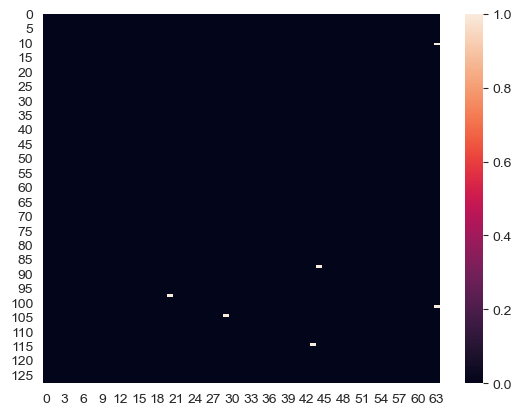

In [45]:
import seaborn as sns
sns.heatmap((red_channel == 2))

In [ ]:



def get_gmm(matrix, n_comp=10):
    arr = np.array(matrix, dtype=np.int32)
    result = array_to_list(arr)
    gmm = mixture.GaussianMixture(n_components=n_comp, max_iter=200).fit(result)
    return gmm


image = io.imread("E:/data/RegionC/RegionCplaqueHires.png")
cropped_image = cut_image(image)
resized = transform.resize(cropped_image, get_exp_array(adata, adata.var.index[0]).shape)
gaussian = filters.gaussian(resized, 3)
binary = np.where(gaussian > np.percentile(gaussian, 40), 1, 0)
gmm = get_gmm(binary, n_comp=20)

In [ ]:
x_min = sp.adata.obsm['spatial_real'][:,1].min()
x_max = sp.adata.obsm['spatial_real'][:,1].max()
y_min = sp.adata.obsm['spatial_real'][:,0].min()
y_max = sp.adata.obsm['spatial_real'][:,0].max()
from PIL import Image
Image.MAX_IMAGE_PIXELS = None
# 打开图像文件
image = Image.open("E://human/GSM4838132_Visium_B_image.tif/GSM4838132_Visium_B_image.tif")  # 替换为你的图像文件路径

# 使用crop方法进行剪裁
cropped_image = image.crop((x_min, y_min, x_max, y_max))

# 保存剪裁后的图像
cropped_image.save("cropped_image.tif")  # 保存为新的文件，也可以覆盖原始文件

In [362]:
sp.fit_pattern(n_top_genes=500, n_comp=50, min_cells=200)
sp.build_distance_array()

Fitting GMM...:  99%|█████████▉| 198/200 [02:33<00:01,  1.29it/s]


KeyboardInterrupt: 

In [361]:
sp.adata.var

,gene_ids,feature_types,genome,highly_variable,means,dispersions,dispersions_norm,n_cells,highly_variable_rank,variances,variances_norm
tbk1,ENSDARG00000103095,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.288534,0.254368,0.185435,708,NaN,0.370893,0.883091
crebl2,ENSDARG00000104049,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.200592,0.360133,0.460984,486,NaN,0.287651,1.052945
si:ch211-51e12.7,ENSDARG00000045914,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.355275,0.151876,-0.651052,875,NaN,0.413162,0.801585
mrps10,ENSDARG00000045913,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.236261,0.075959,-0.279369,645,NaN,0.253889,0.759049
tmem181,ENSDARG00000045910,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.086103,0.247056,0.166385,223,NaN,0.110440,1.073143
...,...,...,...,...,...,...,...,...,...,...,...
CABZ01078055.1,ENSDARG00000104316,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.137100,0.073386,-0.286074,420,NaN,0.146212,0.815401
CABZ01074745.1,ENSDARG00000102748,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.146147,0.080252,-0.268186,444,NaN,0.157656,0.819460
CABZ01111915.1,ENSDARG00000104583,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,0.093112,0.165407,-0.046333,289,NaN,0.109279,0.964640
BRAFhuman,BRAFhuman,Gene Expression,Danio.rerio_genome_BRAF_EGFP_Maayan,False,16.500848,2.450647,1.389014,2583,NaN,185.902529,1.632504


In [355]:
sp.cluster_gene(n_clusters=7, mds_components=20)

In [351]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score

db = {}
ch = {}
si = {}
for i in range(2, 12):
    sp.cluster_gene(n_clusters=i, mds_components=20)
    db[i] = 1 / davies_bouldin_score(sp.genes_distance_array, sp.kmeans_fit_result.labels_)
    ch[i] = calinski_harabasz_score(sp.genes_distance_array, sp.kmeans_fit_result.labels_)
    si[i] = silhouette_score(sp.genes_distance_array, sp.kmeans_fit_result.labels_)


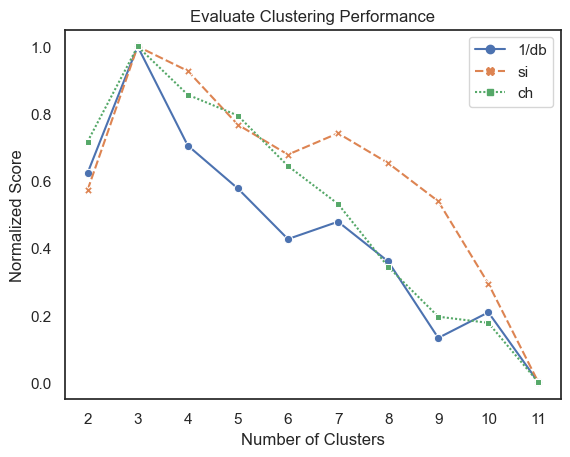

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
index = pd.DataFrame([db,si,ch], index=['1/db','si','ch']).T
index_1 = (index-index.min()) / (index.max() - index.min())
sns.lineplot(index_1, markers=True)
plt.xticks(list(range(2, 12, 1)))
plt.xlabel("Number of Clusters")
plt.ylabel("Normalized Score")
plt.title("Evaluate Clustering Performance")
plt.show()

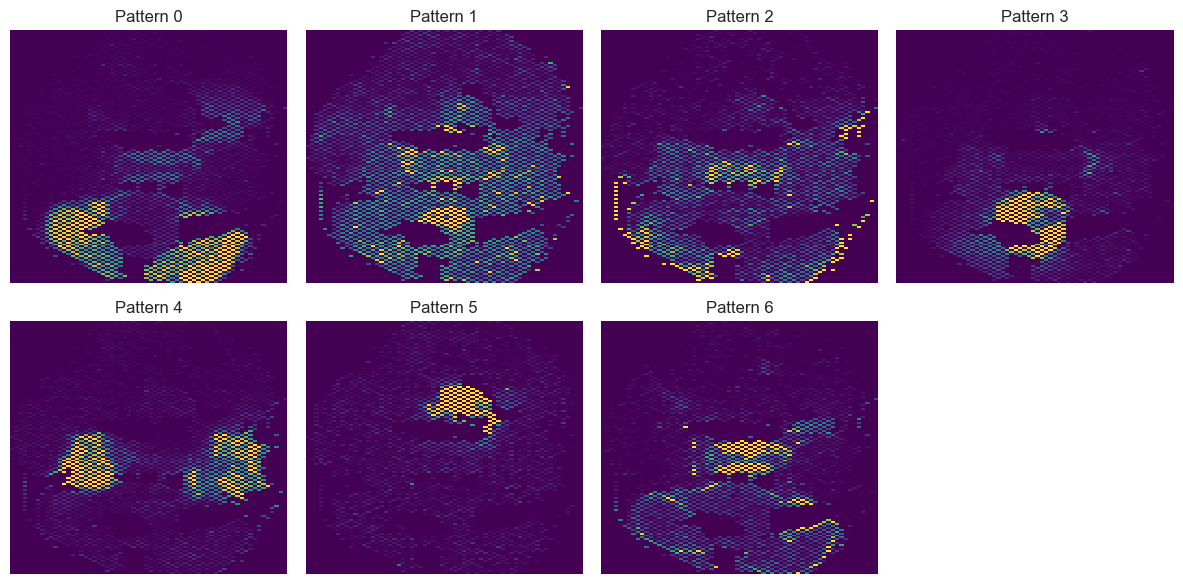

In [356]:
sp.plot.plot_pattern(vmax=99, rotate=True, reverse_y=True, reverse_x=True)

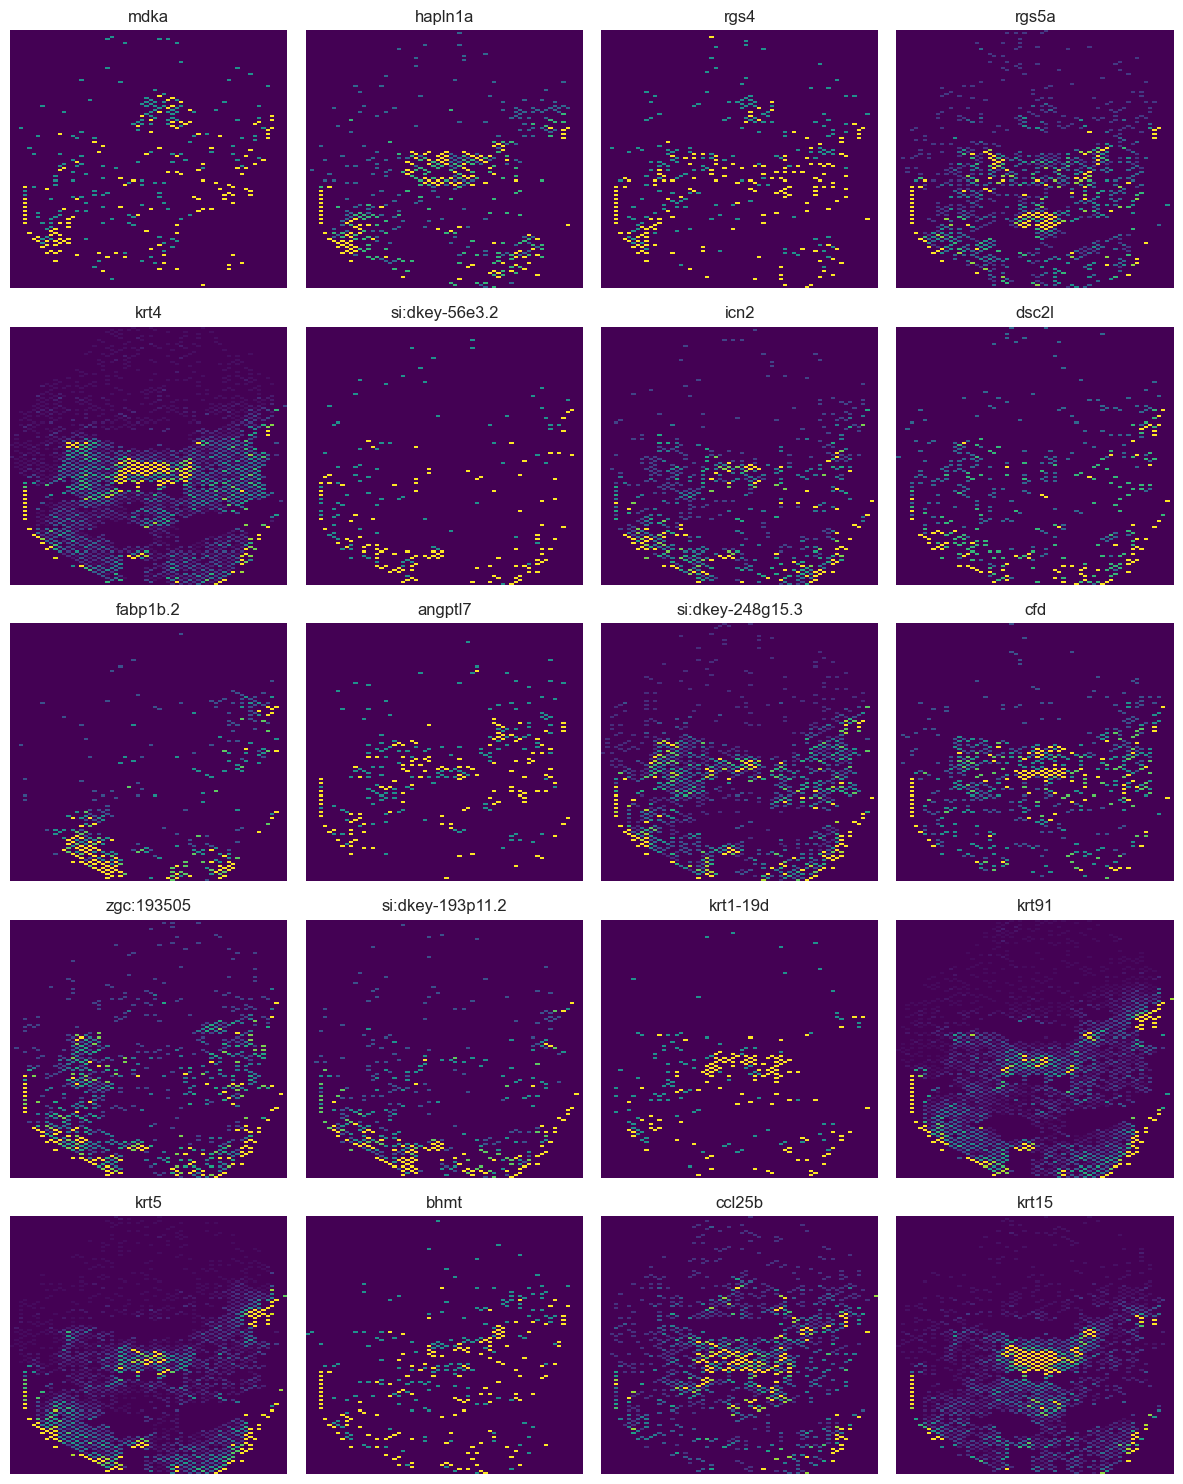

In [360]:
sp.plot.plot_genes(label=2, vmax=99, n_gene=20, cmap='viridis', plot_type='heatmap', rotate=True, reverse_y=True,
                   reverse_x=True)

<Axes: ylabel='Count'>

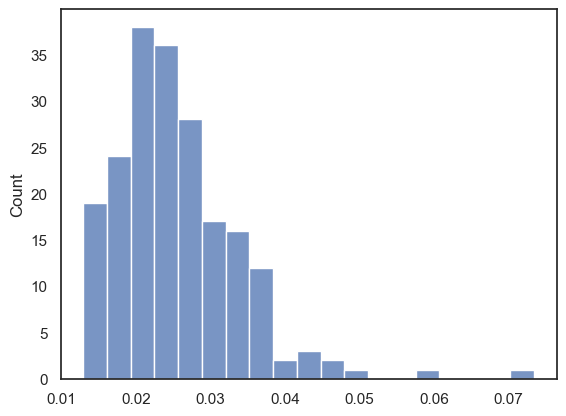

In [283]:
vlist = []
vdict={}
for i in sp.genes_patterns.keys():
    a = np.std(sp.genes_patterns[i].weights_)
    vlist.append(a)
    vdict[i]=a
sns.histplot(vlist)


In [293]:
vdict['krt5']

0.03599397320247399

In [309]:
b = pd.DataFrame(vdict, index=['mse']).T

In [310]:
a = sp.adata.var['variances_norm']

In [318]:
merged = pd.merge(a, b, left_index=True, right_index=True, how='inner')

In [325]:
merged

,variances_norm,mse
crebl2,1.905562,0.018673
cd9b,2.496617,0.024843
tnnt2e,10.028792,0.037871
ENSDARG00000045598,1.854818,0.019086
tnni1d,4.459229,0.026981
...,...,...
mt-co3,1.805014,0.017021
mt-nd3,2.581528,0.020953
mt-nd4,2.639886,0.020204
mt-cyb,2.255205,0.021619


<Axes: xlabel='mse', ylabel='variances_norm'>

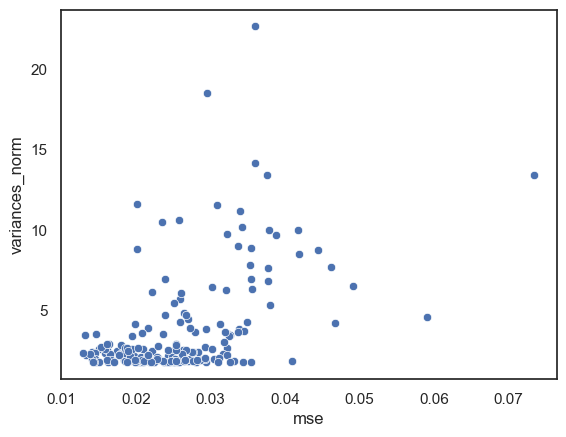

In [322]:
sns.scatterplot(merged, y='variances_norm', x='mse')

In [324]:
np.corrcoef(merged['variances_norm'], merged['mse'])[0, 1]

0.5033727489032802

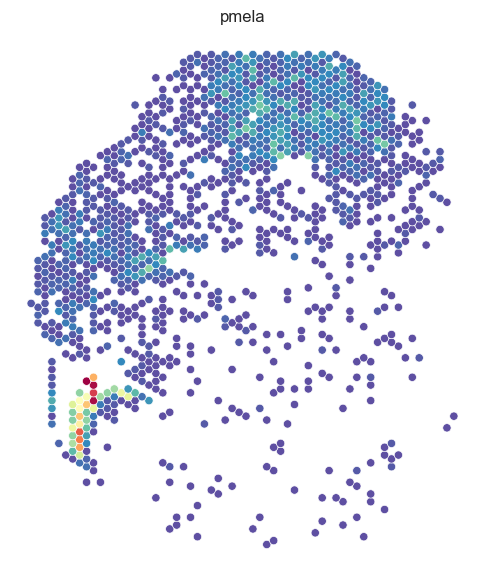

In [366]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 7))
sp.plot.plot_gene('pmela', reverse_x=True, rotate=True)

In [28]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk, ImageDraw


class App:
    def __init__(self):
        self.img = None
        self.img_on_canvas = None

        # Root windows
        self.root = tk.Tk()
        self.root.title("Region Annotation")

        # Create Canvas
        self.canvas = tk.Canvas(self.root, width=800, height=800)
        self.canvas.pack()
        self.canvas.bind("<Button-1>", self.annotate)
        self.canvas.bind("<Button-3>", self.annotate)

        # Create menu
        self.menu = tk.Menu(self.root)
        self.root.config(menu=self.menu)
        self.file_menu = tk.Menu(self.menu)
        self.menu.add_cascade(label="File", menu=self.file_menu)
        self.file_menu.add_command(label="Load image", command=self.open_image)
        self.file_menu.add_command(label="Save image", command=self.save_image)

        self.op_menu = tk.Menu(self.menu)
        self.menu.add_cascade(label="Edit", menu=self.op_menu)
        self.op_menu.add_command(label="Clean up annotations", command=self.clear_annotations)
        self.op_menu.add_command(label="Reset", command=self.reset)

        help_menu = tk.Menu(self.menu)
        self.menu.add_cascade(label="Help", menu=help_menu)
        help_menu.add_command(label="Help", command=self.show_help)
        help_menu.add_command(label="About", command=self.show_help)

        self.help_menu = tk.Menu(self.menu)

    def open_image(self):
        file_path = filedialog.askopenfilename()
        if file_path:
            self.root.title("Loading image... please wait.")
            self.img = Image.open(file_path)
            self.img = self.img.resize((800, 800), Image.ANTIALIAS)  # adjust img size
            self.img_on_canvas = ImageTk.PhotoImage(self.img)
            self.canvas.create_image(0, 0, anchor=tk.NW, image=self.img_on_canvas)
            self.root.title("Region Annotation")

    def annotate(self, event):
        x, y = event.x, event.y
        draw = ImageDraw.Draw(self.img)
        draw.ellipse((x - 5, y - 5, x + 5, y + 5), fill="red", outline="red")
        self.canvas.create_oval(x - 5, y - 5, x + 5, y + 5, fill="red", outline="red")

    def clear_annotations(self):
        self.canvas.delete("all")
        self.canvas.create_image(0, 0, anchor=tk.NW, image=self.img_on_canvas)

    def reset(self):
        self.canvas.delete("all")

    def save_image(self):
        file_path = filedialog.asksaveasfilename(defaultextension=".png", filetypes=[('*', '.png')])
        if file_path:
            self.img.save(file_path)

    def show_help(self):
        help_text = "Usage: \n\n" \
                    "1. Use “File” -> “Load image” to load image.\n" \
                    "2. Click mouse over image to annotate image.\n" \
                    "3. Use “File” -> “Save image” to save the annotated image.\n\n" \
                    "Check the documentation for more details."
        messagebox.showinfo("Help", help_text)

    def run(self):
        self.root.mainloop()


a = App()
a.run()
